In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "./KopubDotumMedium.ttf"

C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) 

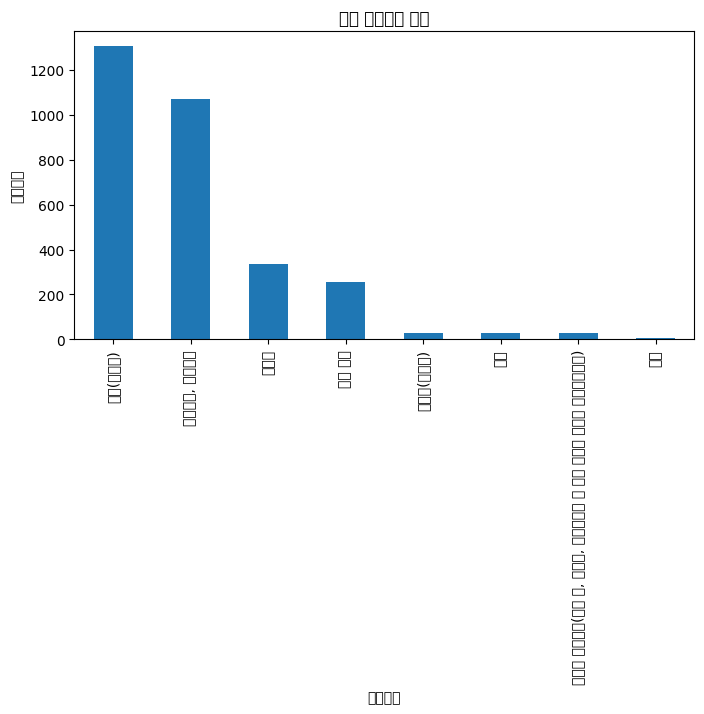

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) m

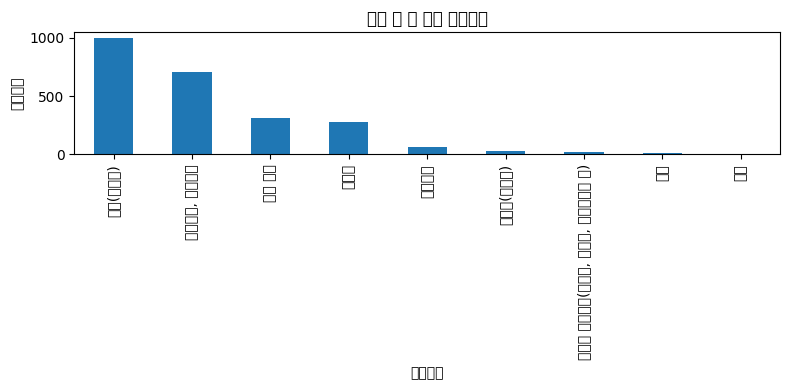

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missi

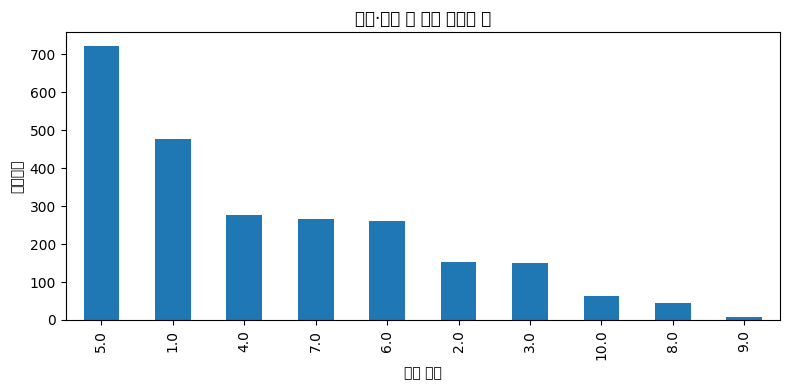

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users

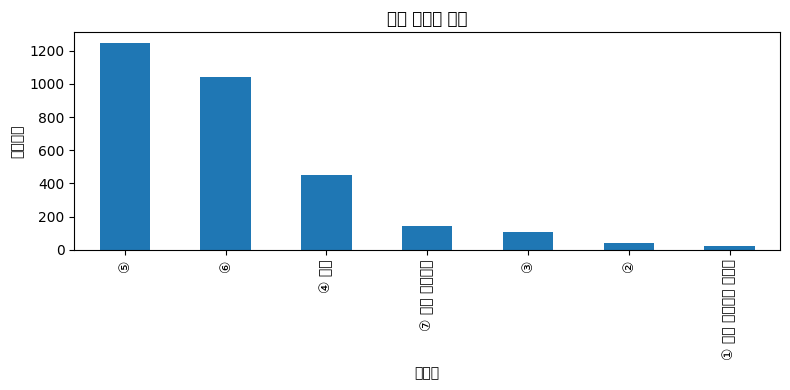

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_survey_data(excel_path: Path) -> pd.DataFrame:
    df_raw = pd.read_excel(excel_path, header=None)
    code_row = df_raw.iloc[1]          # 두 번째 행: 코드명
    df = df_raw.iloc[2:].reset_index(drop=True)  # 응답 데이터만 남김
    df.columns = code_row              # 컬럼명을 코드명으로 지정
    return df

def load_codebook(json_path: Path) -> dict:
    with open(json_path, "r", encoding="utf-8") as f:
        return json.load(f)

def map_response_codes(series: pd.Series, codebook_entry: dict) -> pd.Series:
    mapping = {}
    for code, value in codebook_entry.get("보기", {}).items():
        label = value.get("내용", value) if isinstance(value, dict) else value
        mapping[str(code)] = label
    return series.astype(str).map(mapping).fillna(series)

def plot_value_counts(series: pd.Series, title: str, xlabel: str, ylabel: str) -> None:
    counts = series.value_counts().sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 파일 경로를 자신의 환경에 맞게 수정하세요.
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 데이터 및 코드북 로드
df = load_survey_data(excel_path)
codebook = load_codebook(codebook_path)

# 문항별 라벨 매핑 및 시각화 예시
df["Q16_label"]   = map_response_codes(df["Q16"],   codebook["Q16"])
df["Q15_2_label"] = map_response_codes(df["Q15_2"], codebook["Q15_2"])
df["Q15_5_label"] = map_response_codes(df["Q15_5"], codebook["Q15_5"])
df["Q18_bus"]     = map_response_codes(df["Q18a1"], codebook["Q18a1"])

plot_value_counts(df["Q16_label"],   "평소 이동수단 분포",       "이동수단", "응답자수")
plot_value_counts(df["Q15_2_label"], "통근 시 주 이용 교통수단", "교통수단", "응답자수")
plot_value_counts(df["Q15_5_label"], "통근·통학 시 가장 불편한 점", "불편 요인", "응답자수")
plot_value_counts(df["Q18_bus"],     "버스 만족도 분포",         "만족도",   "응답자수")

In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path

# 엑셀 데이터와 코드북 JSON 경로 설정
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 엑셀 파일 읽기 (헤더가 두 줄인 구조를 처리)
df_raw = pd.read_excel(excel_path, header=None)
code_row = df_raw.iloc[1]                  # 두 번째 행: 코드명 (Q15, Q16 등)
df = df_raw.iloc[2:].reset_index(drop=True)
df.columns = code_row                      # 컬럼명을 코드명으로 지정

# 코드북 로드
with open(codebook_path, "r", encoding="utf-8") as f:
    codebook = json.load(f)

df.head()  # 데이터 확인

1,PID,H0a1,H0a2,H0a3,gender,birth,H0a4,H0a5n1,H0a5opn1,H0a9n1,...,SCORE1,SCORE2,MQ1,MQ2,MQ4,MHQ1,MHQ2,MHQ4,wg,ws
0,29715,1,1,3,1,1992,1,1,NaN,1,...,2,1,4,5.6,4.6,50,56,60.0,241,0.729643
1,51295,1,2,1,2,1981,4,2,NaN,1,...,2,3,4.857143,8,5.3,64.285714,80,71.666667,202.384615,0.612732
2,52982,1,2,2,1,1977,5,1,NaN,1,...,2,3,4.571429,5.6,5.1,59.52381,56,68.333333,212,0.641843
3,54416,1,2,2,1,1975,4,2,NaN,2,...,2,3,3.285714,7.2,4.1,38.095238,72,51.666667,318.416667,0.964027
4,64244,1,2,3,1,1991,3,6,NaN,1,...,2,3,4,6.6,5.1,50,66,68.333333,390.285714,1.181615


In [ ]:
import pandas as pd
import json
from pathlib import Path

# 파일 경로 설정: 자신의 환경에 맞게 수정하세요.
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 설문 응답 데이터 불러오기 (헤더 두 줄 제거 후 코드명 사용)
df_raw = pd.read_excel(excel_path, header=None)
code_row = df_raw.iloc[1]  # 두 번째 행: 코드명
df = df_raw.iloc[2:].reset_index(drop=True)
df.columns = code_row

# 코드북 불러오기
with open(codebook_path, "r", encoding="utf-8") as f:
    codebook = json.load(f)

In [ ]:
def map_response_codes(series: pd.Series, codebook_entry: dict) -> pd.Series:
    """
    설문 응답 코드(숫자)를 코드북의 한글 라벨로 변환합니다.
    """
    mapping = {}
    for code, value in codebook_entry.get("보기", {}).items():
        label = value.get("내용", value) if isinstance(value, dict) else value
        mapping[str(code)] = label
    return series.astype(str).map(mapping).fillna(series)

In [9]:
# 교통 관련 설문 코드 리스트 (필요시 수정/추가)
transport_codes = [
    "Q15", "Q15_2", "Q15_5", "Q16",
    "Q17a1", "Q17a2", "Q17a3", "Q17a4", "Q17a5", "Q17a6",
    "Q18a1", "Q18a2", "Q18a3", "Q18a4", "Q18a5", "Q18a6",
    "Q19a1", "Q19a2", "Q15_4"
]

# 교통 관련 데이터만 추출
df_transport = df[transport_codes].copy()

# 각 문항의 숫자 코드를 라벨로 변환
for code in transport_codes:
    if code in codebook:
        df_transport[code] = map_response_codes(df_transport[code], codebook[code])
    else:
        print(f"{code}: 코드북에 정의되지 않았습니다.")

df_transport.head()

C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects

1,Q15,Q15_2,Q15_5,Q16,Q17a1,Q17a2,Q17a3,Q17a4,Q17a5,Q17a6,Q18a1,Q18a2,Q18a3,Q18a4,Q18a5,Q18a6,Q19a1,Q19a2,Q15_4
0,1,통근버스,1.0,"시내버스, 마을버스",②,②,③,④ 보통,④ 보통,⑤,②,②,④ 보통,④ 보통,④ 보통,④ 보통,④ 보통,④ 보통,6.0
1,1,자차(승용차),5.0,자차(승용차),⑦ 매우 잘 구축되어 있다,⑦ 매우 잘 구축되어 있다,⑤,⑤,④ 보통,⑤,⑦ 매우 만족한다,⑦ 매우 만족한다,⑤,④ 보통,① 전혀 만족하지 않는다,④ 보통,⑥,④ 보통,6.0
2,1,지하철,3.0,자차(승용차),⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,6.0
3,1,자차(승용차),4.0,자차(승용차),⑤,⑥,②,③,③,④ 보통,④ 보통,⑥,②,③,②,④ 보통,③,③,2.0
4,1,"개인형 이동수단(전동휠, 킥보드, 전기자전거 등)",8.0,지하철,⑥,⑥,⑥,⑥,④ 보통,④ 보통,⑥,⑥,⑥,⑥,④ 보통,④ 보통,⑥,④ 보통,6.0


In [10]:
# 저장할 CSV 파일 경로 (원하는 위치로 변경 가능)
output_csv_path = Path("transport_responses_labelled.csv")

# 변환된 데이터 저장
df_transport.to_csv(output_csv_path, index=False, encoding="utf-8-sig")

print(f"라벨이 적용된 교통 문항 데이터가 '{output_csv_path}'에 저장되었습니다.")

라벨이 적용된 교통 문항 데이터가 'transport_responses_labelled.csv'에 저장되었습니다.


In [26]:
df = pd.read_csv("./transport_responses_labelled.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q15     3057 non-null   int64  
 1   Q15_2   2419 non-null   object 
 2   Q15_5   2419 non-null   float64
 3   Q16     3057 non-null   object 
 4   Q17a1   3057 non-null   object 
 5   Q17a2   3057 non-null   object 
 6   Q17a3   3057 non-null   object 
 7   Q17a4   3057 non-null   object 
 8   Q17a5   3057 non-null   object 
 9   Q17a6   3057 non-null   object 
 10  Q18a1   3057 non-null   object 
 11  Q18a2   3057 non-null   object 
 12  Q18a3   3057 non-null   object 
 13  Q18a4   3057 non-null   object 
 14  Q18a5   3057 non-null   object 
 15  Q18a6   3057 non-null   object 
 16  Q19a1   3057 non-null   object 
 17  Q19a2   3057 non-null   object 
 18  Q15_4   2419 non-null   float64
dtypes: float64(2), int64(1), object(16)
memory usage: 453.9+ KB
None
   Q15                        Q15_2  Q15_5    

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 기본 스타일 설정
# plt.style.use('default')
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준, macOS는 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

# # 시각화 함수 (x축: 항목, y축: 응답자 수)
# def plot_column_distribution(df, column_name):
#     col_data = df[column_name].dropna()
#     if col_data.empty:
#         print(f"[{column_name}] 응답 없음 → 건너뜀")
#         return

#     value_counts = col_data.value_counts().sort_values(ascending=False)
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x=value_counts.index, y=value_counts.values, palette="Blues_d")
#     plt.title(f"{column_name} 응답 분포", fontsize=14)
#     plt.xlabel("응답 항목")
#     plt.ylabel("응답자 수")
#     plt.xticks(rotation=45, ha='right')  # x축 라벨이 많을 경우 회전
#     plt.tight_layout()
#     plt.show()

# # 전체 컬럼에 대해 시각화 실행
# for col in df.columns:
#     print(f"📌 {col} 항목 시각화 중...")
#     plot_column_distribution(df, col)

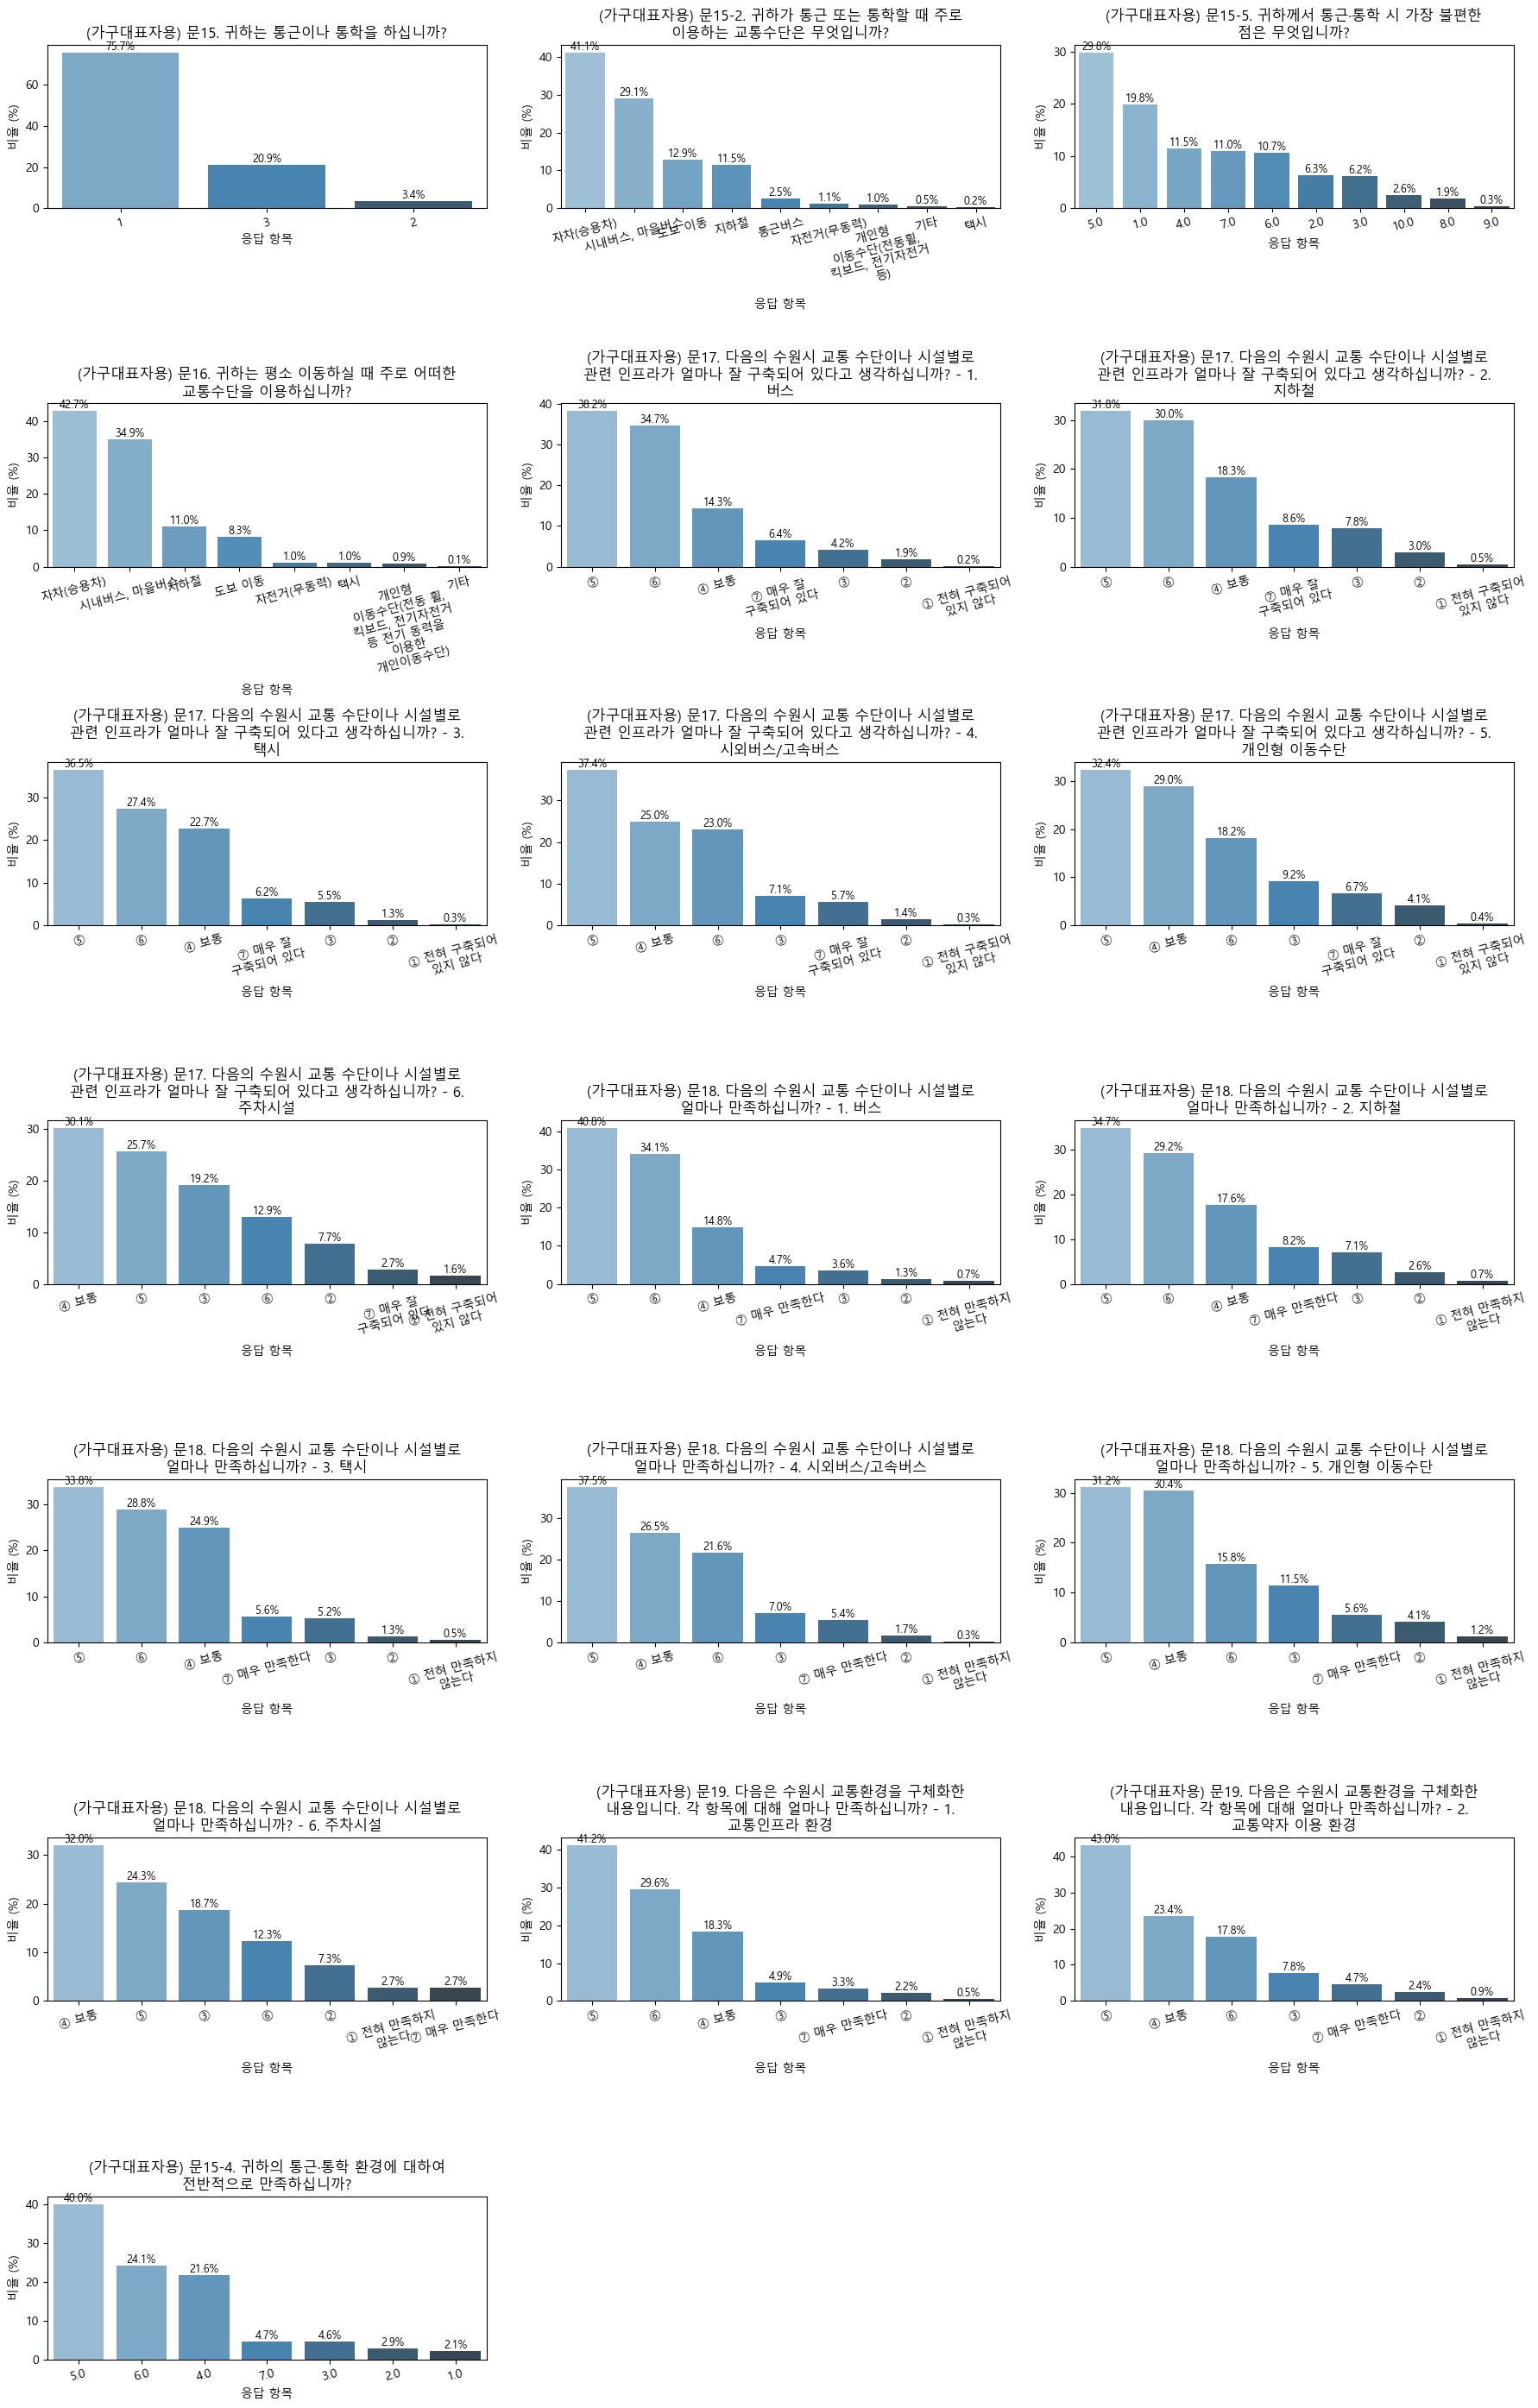

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import textwrap
import json

# -------------------- JSON 코드북 불러오기 --------------------
with open("combined_dict.json", "r", encoding="utf-8") as f:
    codebook = json.load(f)

# -------------------- 시각화 대상 교통 문항 리스트 --------------------
transport_codes = [
    "Q15", "Q15_2", "Q15_5", "Q16",
    "Q17a1", "Q17a2", "Q17a3", "Q17a4", "Q17a5", "Q17a6",
    "Q18a1", "Q18a2", "Q18a3", "Q18a4", "Q18a5", "Q18a6",
    "Q19a1", "Q19a2", "Q15_4"
]

# -------------------- 한글 폰트 설정 --------------------
plt.style.use('default')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 긴 항목 자동 줄바꿈 --------------------
def wrap_labels(labels, width=10):
    return ['\n'.join(textwrap.wrap(str(label), width)) for label in labels]

# -------------------- 시각화 함수 --------------------
def plot_all_distributions(df, question_codes, codebook):
    num_cols = len(question_codes)
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))
    axes = axes.flatten()

    for i, qcode in enumerate(question_codes):
        if qcode not in df.columns:
            print(f"⚠️ {qcode} 항목 없음 → 건너뜀")
            continue

        col_data = df[qcode].dropna()
        if col_data.empty:
            print(f"[{qcode}] 응답 없음 → 건너뜀")
            continue

        value_counts = col_data.value_counts(normalize=True).sort_values(ascending=False)
        labels = value_counts.index
        wrapped_labels = wrap_labels(labels, width=10)
        percentages = (value_counts.values * 100).round(1)

        sns.barplot(
            x=wrapped_labels,
            y=percentages,
            hue=wrapped_labels,
            palette="Blues_d",
            legend=False,
            ax=axes[i]
        )

        # ✅ 문항명 추출: JSON에서 "문항명" 키 사용
        question_text = codebook.get(qcode, {}).get("문항명", f"{qcode}")

        axes[i].set_title('\n'.join(textwrap.wrap(question_text, width=35)), fontsize=12)
        axes[i].set_xlabel("응답 항목")
        axes[i].set_ylabel("비율 (%)")
        axes[i].tick_params(axis='x', labelrotation=15)

        # 막대 위에 비율 표시
        for j, p in enumerate(axes[i].patches):
            height = p.get_height()
            axes[i].annotate(f"{percentages[j]}%",
                             (p.get_x() + p.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=9)

    # 남는 subplot 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# -------------------- 실행 --------------------
plot_all_distributions(df, transport_codes, codebook)

In [30]:
with open("combined_dict.json", "r", encoding="utf-8") as f:
    codebook = json.load(f)
    
# 문항 코드 → 문항명 매핑 딕셔너리 생성
column_rename_map = {}

for col in df.columns:
    if col in codebook and "문항명" in codebook[col]:
        question_name = codebook[col]["문항명"]
        column_rename_map[col] = question_name

# 컬럼명 변경
df_renamed = df.rename(columns=column_rename_map)

# 새 파일로 저장
df_renamed.to_csv("설문응답_문항명변경.csv", index=False, encoding='utf-8-sig')

print("✅ 저장 완료: 설문응답_문항명변경.csv")


✅ 저장 완료: 설문응답_문항명변경.csv


In [32]:
print(df_renamed.tail())

      (가구대표자용) 문15. 귀하는 통근이나 통학을 하십니까?  \
3052                                 1   
3053                                 1   
3054                                 1   
3055                                 1   
3056                                 1   

     (가구대표자용) 문15-2. 귀하가 통근 또는 통학할 때 주로 이용하는 교통수단은 무엇입니까?  \
3052                                         시내버스, 마을버스     
3053                                            자차(승용차)     
3054                                           자전거(무동력)     
3055                        개인형 이동수단(전동휠, 킥보드, 전기자전거 등)     
3056                                            자차(승용차)     

      (가구대표자용) 문15-5. 귀하께서 통근·통학 시 가장 불편한 점은 무엇입니까?  \
3052                                            1.0   
3053                                            4.0   
3054                                            9.0   
3055                                            4.0   
3056                                            7.0   

     (가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하

,문항명,부정비율(%),응답수
0,(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까?...,28.8,3057
1,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,28.5,3057
2,(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까?...,16.9,3057
3,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,13.7,3057
4,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,11.4,3057


C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\3500449098.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="부정비율(%)", y="문항명",


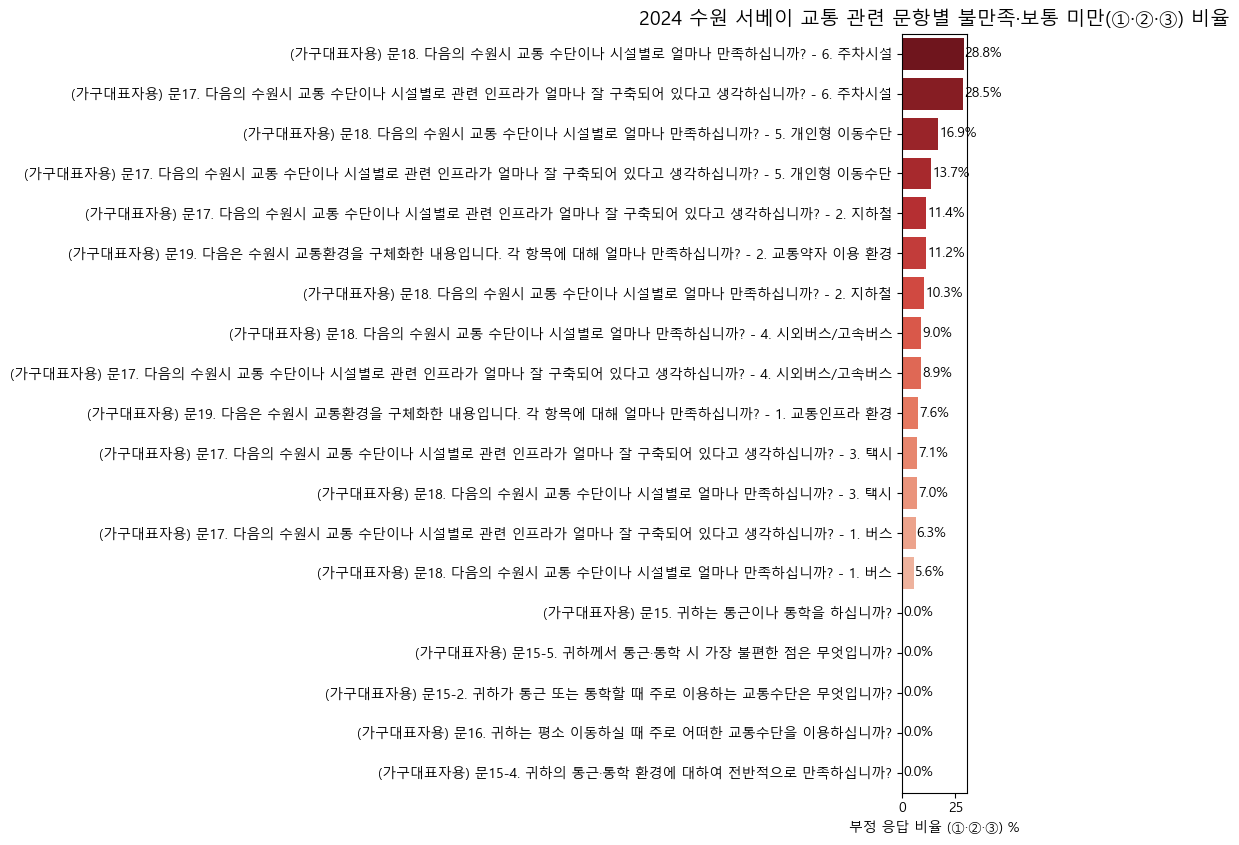

In [34]:
# --------------------------------------------------------------------
# 0. 준비 : 라이브러리 로드 & 경로 지정
# --------------------------------------------------------------------
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

csv_path   = "설문응답_문항명변경.csv"   # ← 앞에서 컬럼명을 문항명으로 바꿔 저장한 파일
low_regex  = re.compile(r"[①②③]")      # '①‧②‧③'이 들어간 응답 = 부정적(보통 미만)

# --------------------------------------------------------------------
# 1. 데이터 읽기
# --------------------------------------------------------------------
df = pd.read_csv(csv_path, encoding="utf-8-sig")

# 교통 관련 문항(문항명)만 추리기 ─ 필요하면 수정
transport_questions = [c for c in df.columns if c.startswith("(가구대표자용) 문15")
                       or c.startswith("(가구대표자용) 문16")
                       or c.startswith("(가구대표자용) 문17")
                       or c.startswith("(가구대표자용) 문18")
                       or c.startswith("(가구대표자용) 문19")]

# --------------------------------------------------------------------
# 2. 각 문항별 '①·②·③' 비율 계산
# --------------------------------------------------------------------
summary = []
for col in transport_questions:
    series = df[col].dropna().astype(str)
    total  = len(series)
    low_cnt = series.str.contains(low_regex).sum()
    pct = round(low_cnt / total * 100, 1) if total else 0.0
    summary.append({"문항명": col, "부정비율(%)": pct, "응답수": total})

summary_df = (pd.DataFrame(summary)
              .sort_values("부정비율(%)", ascending=False)
              .reset_index(drop=True))

# 확인용 표
display(summary_df.head())

# --------------------------------------------------------------------
# 3. 시각화 (내림차순 막대그래프)
# --------------------------------------------------------------------
plt.figure(figsize=(10, 0.45 * len(summary_df)))
sns.barplot(x="부정비율(%)", y="문항명",
            data=summary_df,
            palette="Reds_r")

plt.xlabel("부정 응답 비율 (①·②·③) %")
plt.ylabel("")
plt.title("2024 수원 서베이 교통 관련 문항별 불만족·보통 미만(①·②·③) 비율", fontsize=14)

# 막대 위에 값 표기
for i, v in enumerate(summary_df["부정비율(%)"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()
